In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import re
from shapely.geometry import Point
import folium
from folium.plugins import MarkerCluster

In [2]:
path = 'data/county/tl_2021_47_tract/tl_2021_47_tract.shp'
tiger_df = gpd.read_file(path)
tiger_df = tiger_df.to_crs("EPSG:4326")

county = gpd.read_file('data/county/tl_2022_us_county.shp')
county_map = county.loc[(county.NAME == 'Davidson') & (county.STATEFP == '47')]

zipcodes = gpd.read_file('data/county/zipcodes.geojson')



In [3]:
davidson_loc = tiger_df.loc[(tiger_df.COUNTYFP == '037')]

In [4]:
davidson_loc['TRACTCE'] = davidson_loc['TRACTCE'].astype(str)
davidson_loc['TRACTCE'] = '37' + davidson_loc['TRACTCE']
davidson_loc['TRACTCE'] = davidson_loc['TRACTCE'].astype(int)

/home/nhac/anaconda3/envs/py-geo/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [5]:
davidson_loc

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
37,47,037,37013202,47037013202,132.02,Census Tract 132.02,G5020,S,2721406,12651,+36.1602781,-086.8703605,"POLYGON ((-86.88928 36.16390, -86.88908 36.163..."
38,47,037,37013201,47037013201,132.01,Census Tract 132.01,G5020,S,1909944,254000,+36.1496854,-086.8826046,"POLYGON ((-86.89207 36.14293, -86.89191 36.143..."
39,47,037,37018409,47037018409,184.09,Census Tract 184.09,G5020,S,3432607,0,+36.0757738,-086.9512200,"POLYGON ((-86.98718 36.07301, -86.98711 36.073..."
40,47,037,37018410,47037018410,184.10,Census Tract 184.10,G5020,S,1227824,0,+36.0712762,-086.9382585,"POLYGON ((-86.94693 36.07136, -86.94679 36.071..."
42,47,037,37015804,47037015804,158.04,Census Tract 158.04,G5020,S,1664634,0,+36.1346906,-086.7023849,"POLYGON ((-86.71027 36.14236, -86.70897 36.142..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,47,037,37017500,47037017500,175,Census Tract 175,G5020,S,2900693,0,+36.1012125,-086.7435769,"POLYGON ((-86.75765 36.08379, -86.75758 36.083..."
1675,47,037,37015613,47037015613,156.13,Census Tract 156.13,G5020,S,8565186,4714,+36.0881988,-086.6808560,"POLYGON ((-86.71198 36.10101, -86.71187 36.101..."
1682,47,037,37010301,47037010301,103.01,Census Tract 103.01,G5020,S,8527942,11775,+36.3161492,-086.7261435,"POLYGON ((-86.74132 36.29354, -86.74119 36.293..."
1683,47,037,37010802,47037010802,108.02,Census Tract 108.02,G5020,S,5339985,0,+36.2509942,-086.7319002,"POLYGON ((-86.75148 36.24075, -86.75135 36.240..."


In [6]:
print(zipcodes.crs)

epsg:4326


In [7]:
housing = pd.read_csv('prop_sales_loc.csv')

In [8]:
housing

,Unnamed: 0,apn,saleamount,ownername,status,ownerdate,tract,parceltype,saleprice,ludesc,assessdate,propzip,owner,geometry,centroid
0,0,00200004500,272500.0,"HARP, MEGAN & SPENCER",Historical,2019-12-09,37010202.0,101,393000.0,SINGLE FAMILY,2021-01-01,37072,"HUNTER, ELLEN","((-86.76135639334478,36.3954012509418),(-86.76...","(-86.76150711122163,36.394839711854296)"
1,1,00200004500,29000.0,"COX, DOUG & GRETCHEN",Historical,2019-02-28,37010202.0,101,393000.0,SINGLE FAMILY,2021-01-01,37072,"HUNTER, ELLEN","((-86.76135639334478,36.3954012509418),(-86.76...","(-86.76150711122163,36.394839711854296)"
2,2,00200004500,29000.0,"COX, DOUG & GRETCHEN",Historical,2019-02-28,37010202.0,101,393000.0,SINGLE FAMILY,2021-01-01,37072,"HUNTER, ELLEN","((-86.76135639334478,36.3954012509418),(-86.76...","(-86.76150711122163,36.394839711854296)"
3,3,00200002700,165000.0,"LYNN, JERRY & CAROLYN",Historical,2020-05-08,37010202.0,101,440000.0,SINGLE FAMILY,2021-01-01,37072,"BOSTICK, JENNIFFER I & TRAYMAINE V","((-86.7627237712887,36.39387621844443),(-86.76...","(-86.76308736156855,36.39356184510311)"
4,4,00200003200,151000.0,"PURVIS, BRIAN & RIZZA BADUA",Current,2015-05-11,37010202.0,101,151000.0,SINGLE FAMILY,2021-01-01,37072,"PURVIS, BRIAN & RIZZA BADUA","((-86.75761919788782,36.39274139981206),(-86.7...","(-86.75825225147936,36.39285226336255)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205933,205933,082140A06000CO,267000.0,"BOWEN, ANDREW C.",Current,2019-03-01,37019400.0,102,267000.0,RESIDENTIAL CONDO,2021-01-01,37201,"BOWEN, ANDREW C.","((-86.78057864974939,36.173530477350035),(-86....","(-86.78064200180489,36.173521795307046)"
205934,205934,082140A06000CO,145000.0,"SHERRELL, KEN & TAMRA",Historical,2014-10-24,37019400.0,102,267000.0,RESIDENTIAL CONDO,2021-01-01,37201,"BOWEN, ANDREW C.","((-86.78057864974939,36.173530477350035),(-86....","(-86.78064200180489,36.173521795307046)"
205935,205935,082140A06000CO,113000.0,"FMBC INVESTMENTS, LLC",Historical,2012-06-07,37019400.0,102,267000.0,RESIDENTIAL CONDO,2021-01-01,37201,"BOWEN, ANDREW C.","((-86.78057864974939,36.173530477350035),(-86....","(-86.78064200180489,36.173521795307046)"
205936,205936,091092E00200CO,175000.0,"WILLMS HOME IMPROVEMENT, LLC",Historical,2018-03-08,37013202.0,101,0.0,RESIDENTIAL CONDO,2021-01-01,37209,"WILLMS, KURT M & ASHLEY G","((-86.86826625662843,36.15760733423352),(-86.8...","(-86.86817643793131,36.157571023818996)"


In [9]:
# Create two lists for the loop results to be placed
lat = []
lon = []

# For each row in a varible,
for row in housing['centroid']:
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        lat.append(row.split(',')[0])
        # Split the row by comma and append
        # everything after the comma to lon
        lon.append(row.split(',')[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
housing['longitude'] = lat
housing['latitude'] = lon

In [10]:
housing

,Unnamed: 0,apn,saleamount,ownername,status,ownerdate,tract,parceltype,saleprice,ludesc,assessdate,propzip,owner,geometry,centroid,longitude,latitude
0,0,00200004500,272500.0,"HARP, MEGAN & SPENCER",Historical,2019-12-09,37010202.0,101,393000.0,SINGLE FAMILY,2021-01-01,37072,"HUNTER, ELLEN","((-86.76135639334478,36.3954012509418),(-86.76...","(-86.76150711122163,36.394839711854296)",(-86.76150711122163,36.394839711854296)
1,1,00200004500,29000.0,"COX, DOUG & GRETCHEN",Historical,2019-02-28,37010202.0,101,393000.0,SINGLE FAMILY,2021-01-01,37072,"HUNTER, ELLEN","((-86.76135639334478,36.3954012509418),(-86.76...","(-86.76150711122163,36.394839711854296)",(-86.76150711122163,36.394839711854296)
2,2,00200004500,29000.0,"COX, DOUG & GRETCHEN",Historical,2019-02-28,37010202.0,101,393000.0,SINGLE FAMILY,2021-01-01,37072,"HUNTER, ELLEN","((-86.76135639334478,36.3954012509418),(-86.76...","(-86.76150711122163,36.394839711854296)",(-86.76150711122163,36.394839711854296)
3,3,00200002700,165000.0,"LYNN, JERRY & CAROLYN",Historical,2020-05-08,37010202.0,101,440000.0,SINGLE FAMILY,2021-01-01,37072,"BOSTICK, JENNIFFER I & TRAYMAINE V","((-86.7627237712887,36.39387621844443),(-86.76...","(-86.76308736156855,36.39356184510311)",(-86.76308736156855,36.39356184510311)
4,4,00200003200,151000.0,"PURVIS, BRIAN & RIZZA BADUA",Current,2015-05-11,37010202.0,101,151000.0,SINGLE FAMILY,2021-01-01,37072,"PURVIS, BRIAN & RIZZA BADUA","((-86.75761919788782,36.39274139981206),(-86.7...","(-86.75825225147936,36.39285226336255)",(-86.75825225147936,36.39285226336255)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205933,205933,082140A06000CO,267000.0,"BOWEN, ANDREW C.",Current,2019-03-01,37019400.0,102,267000.0,RESIDENTIAL CONDO,2021-01-01,37201,"BOWEN, ANDREW C.","((-86.78057864974939,36.173530477350035),(-86....","(-86.78064200180489,36.173521795307046)",(-86.78064200180489,36.173521795307046)
205934,205934,082140A06000CO,145000.0,"SHERRELL, KEN & TAMRA",Historical,2014-10-24,37019400.0,102,267000.0,RESIDENTIAL CONDO,2021-01-01,37201,"BOWEN, ANDREW C.","((-86.78057864974939,36.173530477350035),(-86....","(-86.78064200180489,36.173521795307046)",(-86.78064200180489,36.173521795307046)
205935,205935,082140A06000CO,113000.0,"FMBC INVESTMENTS, LLC",Historical,2012-06-07,37019400.0,102,267000.0,RESIDENTIAL CONDO,2021-01-01,37201,"BOWEN, ANDREW C.","((-86.78057864974939,36.173530477350035),(-86....","(-86.78064200180489,36.173521795307046)",(-86.78064200180489,36.173521795307046)
205936,205936,091092E00200CO,175000.0,"WILLMS HOME IMPROVEMENT, LLC",Historical,2018-03-08,37013202.0,101,0.0,RESIDENTIAL CONDO,2021-01-01,37209,"WILLMS, KURT M & ASHLEY G","((-86.86826625662843,36.15760733423352),(-86.8...","(-86.86817643793131,36.157571023818996)",(-86.86817643793131,36.157571023818996)


In [11]:
housing['latitude'] = housing['latitude'].str.replace(')', '')

/tmp/ipykernel_19445/771078865.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  housing['latitude'] = housing['latitude'].str.replace(')', '')


In [12]:
housing['longitude'] = housing['longitude'].str.replace('(','')

/tmp/ipykernel_19445/2874055331.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  housing['longitude'] = housing['longitude'].str.replace('(','')


In [13]:
housing

,Unnamed: 0,apn,saleamount,ownername,status,ownerdate,tract,parceltype,saleprice,ludesc,assessdate,propzip,owner,geometry,centroid,longitude,latitude
0,0,00200004500,272500.0,"HARP, MEGAN & SPENCER",Historical,2019-12-09,37010202.0,101,393000.0,SINGLE FAMILY,2021-01-01,37072,"HUNTER, ELLEN","((-86.76135639334478,36.3954012509418),(-86.76...","(-86.76150711122163,36.394839711854296)",-86.76150711122163,36.394839711854296
1,1,00200004500,29000.0,"COX, DOUG & GRETCHEN",Historical,2019-02-28,37010202.0,101,393000.0,SINGLE FAMILY,2021-01-01,37072,"HUNTER, ELLEN","((-86.76135639334478,36.3954012509418),(-86.76...","(-86.76150711122163,36.394839711854296)",-86.76150711122163,36.394839711854296
2,2,00200004500,29000.0,"COX, DOUG & GRETCHEN",Historical,2019-02-28,37010202.0,101,393000.0,SINGLE FAMILY,2021-01-01,37072,"HUNTER, ELLEN","((-86.76135639334478,36.3954012509418),(-86.76...","(-86.76150711122163,36.394839711854296)",-86.76150711122163,36.394839711854296
3,3,00200002700,165000.0,"LYNN, JERRY & CAROLYN",Historical,2020-05-08,37010202.0,101,440000.0,SINGLE FAMILY,2021-01-01,37072,"BOSTICK, JENNIFFER I & TRAYMAINE V","((-86.7627237712887,36.39387621844443),(-86.76...","(-86.76308736156855,36.39356184510311)",-86.76308736156855,36.39356184510311
4,4,00200003200,151000.0,"PURVIS, BRIAN & RIZZA BADUA",Current,2015-05-11,37010202.0,101,151000.0,SINGLE FAMILY,2021-01-01,37072,"PURVIS, BRIAN & RIZZA BADUA","((-86.75761919788782,36.39274139981206),(-86.7...","(-86.75825225147936,36.39285226336255)",-86.75825225147936,36.39285226336255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205933,205933,082140A06000CO,267000.0,"BOWEN, ANDREW C.",Current,2019-03-01,37019400.0,102,267000.0,RESIDENTIAL CONDO,2021-01-01,37201,"BOWEN, ANDREW C.","((-86.78057864974939,36.173530477350035),(-86....","(-86.78064200180489,36.173521795307046)",-86.78064200180489,36.173521795307046
205934,205934,082140A06000CO,145000.0,"SHERRELL, KEN & TAMRA",Historical,2014-10-24,37019400.0,102,267000.0,RESIDENTIAL CONDO,2021-01-01,37201,"BOWEN, ANDREW C.","((-86.78057864974939,36.173530477350035),(-86....","(-86.78064200180489,36.173521795307046)",-86.78064200180489,36.173521795307046
205935,205935,082140A06000CO,113000.0,"FMBC INVESTMENTS, LLC",Historical,2012-06-07,37019400.0,102,267000.0,RESIDENTIAL CONDO,2021-01-01,37201,"BOWEN, ANDREW C.","((-86.78057864974939,36.173530477350035),(-86....","(-86.78064200180489,36.173521795307046)",-86.78064200180489,36.173521795307046
205936,205936,091092E00200CO,175000.0,"WILLMS HOME IMPROVEMENT, LLC",Historical,2018-03-08,37013202.0,101,0.0,RESIDENTIAL CONDO,2021-01-01,37209,"WILLMS, KURT M & ASHLEY G","((-86.86826625662843,36.15760733423352),(-86.8...","(-86.86817643793131,36.157571023818996)",-86.86817643793131,36.157571023818996


In [14]:
housing['point'] = housing.apply(lambda x: Point((float(x.longitude), 
                                                  float(x.latitude))), 
                                        axis=1)
housing.head(3)

/home/nhac/anaconda3/envs/py-geo/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,Unnamed: 0,apn,saleamount,ownername,status,ownerdate,tract,parceltype,saleprice,ludesc,assessdate,propzip,owner,geometry,centroid,longitude,latitude,point
0,0,00200004500,272500.0,"HARP, MEGAN & SPENCER",Historical,2019-12-09,37010202.0,101,393000.0,SINGLE FAMILY,2021-01-01,37072,"HUNTER, ELLEN","((-86.76135639334478,36.3954012509418),(-86.76...","(-86.76150711122163,36.394839711854296)",-86.76150711122163,36.394839711854296,POINT (-86.76150711122163 36.394839711854296)
1,1,00200004500,29000.0,"COX, DOUG & GRETCHEN",Historical,2019-02-28,37010202.0,101,393000.0,SINGLE FAMILY,2021-01-01,37072,"HUNTER, ELLEN","((-86.76135639334478,36.3954012509418),(-86.76...","(-86.76150711122163,36.394839711854296)",-86.76150711122163,36.394839711854296,POINT (-86.76150711122163 36.394839711854296)
2,2,00200004500,29000.0,"COX, DOUG & GRETCHEN",Historical,2019-02-28,37010202.0,101,393000.0,SINGLE FAMILY,2021-01-01,37072,"HUNTER, ELLEN","((-86.76135639334478,36.3954012509418),(-86.76...","(-86.76150711122163,36.394839711854296)",-86.76150711122163,36.394839711854296,POINT (-86.76150711122163 36.394839711854296)


In [15]:
del housing['geometry']

In [16]:
centroid_gdf = gpd.GeoDataFrame(housing,
                            crs = zipcodes.crs,
                            geometry = housing['point'])

In [17]:
type(centroid_gdf)

geopandas.geodataframe.GeoDataFrame

### SJOIN!!!

In [18]:
apn_by_zip = gpd.sjoin(centroid_gdf, davidson_loc, op='within')

/home/nhac/anaconda3/envs/py-geo/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [19]:
apn_by_zip['tract'].value_counts()

3.701911e+07    9832
3.701563e+07    6794
3.701950e+07    4022
3.701330e+07    3920
3.701940e+07    3196
                ... 
4.703702e+10      15
4.073702e+10      13
1.170000e+04       5
4.703402e+10       3
1.540100e+04       1
Name: tract, Length: 166, dtype: int64

In [20]:
# EXAMPLE: apn_in_tract_test = apn_by_zip.loc[apn_by_zip['tract'] == 37010202.0]

In [32]:
# --- TOP 5 Outliers 
apn_top1 = apn_by_zip.loc[apn_by_zip['tract'] == 37014300.0]
apn_top2 = apn_by_zip.loc[apn_by_zip['tract'] == 37013700.0]
apn_top3 = apn_by_zip.loc[apn_by_zip['tract'] == 37012600.0]
apn_top4 = apn_by_zip.loc[apn_by_zip['tract'] == 37011300.0]
apn_top5 = apn_by_zip.loc[apn_by_zip['tract'] == 37013800.0]



# --- BOTTOM 5 outliers
apn_bot1 = apn_by_zip.loc[apn_by_zip['tract'] == 37016600.0].head(1)
apn_bot2 = apn_by_zip.loc[apn_by_zip['tract'] == 37018803.0]
apn_bot3 = apn_by_zip.loc[apn_by_zip['tract'] == 37019115.0]
apn_bot4 = apn_by_zip.loc[apn_by_zip['tract'] == 37015630.0]
apn_bot5 = apn_by_zip.loc[apn_by_zip['tract'] == 37018203.0]


In [22]:
# Random list for tops and bottoms
# top_list = ['37019500.0','37018201.0','37015405.0','37013300.0','37019116.0']
# bot_list = ['37011900.0', '37015629.0', '37018000.0', '37015624.0', '37015404.0']  

<AxesSubplot: >

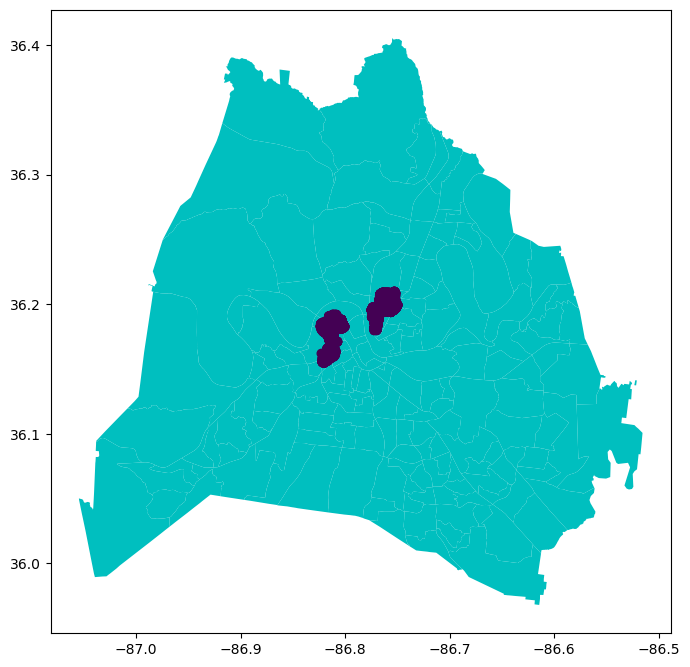

In [23]:
# Plot TOP 5 using Matplotlib
ax = davidson_loc.plot(figsize=(8,10), color='c')
apn_top1.plot(ax = ax, column = 'tract')
apn_top2.plot(ax = ax, column = 'tract')
apn_top3.plot(ax = ax, column = 'tract')
apn_top4.plot(ax = ax, column = 'tract')
apn_top5.plot(ax = ax, column = 'tract')

<AxesSubplot: >

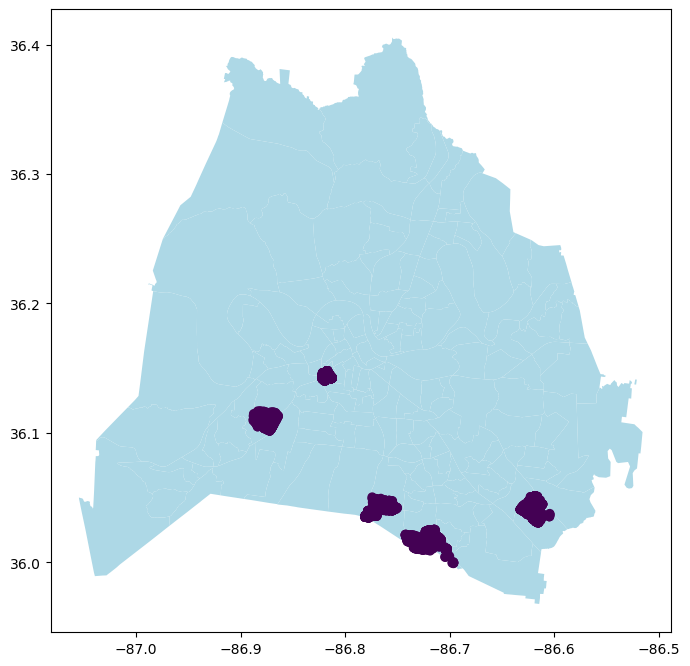

In [24]:
# Plot BOTTOM 5 using Matplotlib
ax = davidson_loc.plot(figsize=(8,10), color='lightblue')
apn_bot1.plot(ax = ax, column = 'tract')
apn_bot2.plot(ax = ax, column = 'tract')
apn_bot3.plot(ax = ax, column = 'tract')
apn_bot4.plot(ax = ax, column = 'tract')
apn_bot5.plot(ax = ax, column = 'tract')

In [25]:
map_top = folium.Map(location= (36.174465, -86.767960), zoom_start= 12, tiles="openstreetmap")
mrk_cluster = MarkerCluster().add_to(map_top)
folium.GeoJson(davidson_loc).add_to(map_top)


for i, row in apn_top1.iterrows():
    loc= [row['INTPTLAT'], row['INTPTLON']]
    pop= str(row['apn'])
    icon=folium.Icon(color='green',icon='tree',prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop,
    icon = icon)
    
    marker.add_to(mrk_cluster)

for i, row in apn_top2.iterrows():
    loc= [row['INTPTLAT'], row['INTPTLON']]
    pop= str(row['apn'])
    icon=folium.Icon(color='green',icon='tree',prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop,
    icon = icon)
    
    marker.add_to(mrk_cluster)

for i, row in apn_top3.iterrows():
    loc= [row['INTPTLAT'], row['INTPTLON']]
    pop= str(row['apn'])
    icon=folium.Icon(color='green',icon='tree',prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop,
    icon = icon)
    
    marker.add_to(mrk_cluster)
    
for i, row in apn_top4.iterrows():
    loc= [row['INTPTLAT'], row['INTPTLON']]
    pop= str(row['apn'])
    icon=folium.Icon(color='green',icon='tree',prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop,
    icon = icon)
    
    marker.add_to(mrk_cluster)
    
for i, row in apn_top5.iterrows():
    loc= [row['INTPTLAT'], row['INTPTLON']]
    pop= str(row['apn'])
    icon=folium.Icon(color='green',icon='tree',prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop,
    icon = icon)
    
    marker.add_to(mrk_cluster)
    


In [26]:
#map_top.save(outfile='test_top_5.html')

In [27]:
map_bottom = folium.Map(location= (36.174465, -86.767960), zoom_start= 11)
mrk_cluster = MarkerCluster().add_to(map_bottom)
folium.GeoJson(davidson_loc).add_to(map_bottom)


for i, row in apn_bot1.iterrows():
    loc= [row['INTPTLAT'], row['INTPTLON']]
    pop= str(row['TRACTCE'])
    icon=folium.Icon(color='green',icon='house',prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop,
    icon = icon)
    
    marker.add_to(mrk_cluster)

for i, row in apn_bot2.iterrows():
    loc= [row['INTPTLAT'], row['INTPTLON']]
    pop= str(row['TRACTCE'])
    icon=folium.Icon(color='green',icon='house',prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop,
    icon = icon)
    
    marker.add_to(mrk_cluster)
    
for i, row in apn_bot3.iterrows():
    loc= [row['INTPTLAT'], row['INTPTLON']]
    pop= str(row['TRACTCE'])
    icon=folium.Icon(color='green',icon='house',prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop,
    icon = icon)
    
    marker.add_to(mrk_cluster)
    
for i, row in apn_bot4.iterrows():
    loc= [row['INTPTLAT'], row['INTPTLON']]
    pop= str(row['TRACTCE'])
    icon=folium.Icon(color='green',icon='house',prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop,
    icon = icon)
    
    marker.add_to(mrk_cluster)
    
for i, row in apn_bot5.iterrows():
    loc= [row['INTPTLAT'], row['INTPTLON']]
    pop= str(row['TRACTCE'])
    icon=folium.Icon(color='green',icon='house',prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop,
    icon = icon)
    
    marker.add_to(mrk_cluster)

In [33]:
map_map = folium.Map(location= (36.174465, -86.767960), zoom_start= 11)
mrk_cluster = MarkerCluster().add_to(map_map)
folium.GeoJson(davidson_loc).add_to(map_map)

for i, row in apn_top1.iterrows():
    loc= [row['INTPTLAT'], row['INTPTLON']]
    pop= str(row['TRACTCE'])
    icon=folium.Icon(color='green',icon='house',prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop,
    icon = icon)
    
    marker.add_to(mrk_cluster)


In [35]:
map_map

map